In [5]:
!pip install wordcloud

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, Markdown
from wordcloud import WordCloud
from collections import Counter

In [8]:
df = pd.read_csv(r"./gta_titles.csv")
df['sentiment_label'] = df['title_sentiment'].map({1: 'Positive', 0: 'Negative/Neutral'})

/Users/felixwang/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/felixwang/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


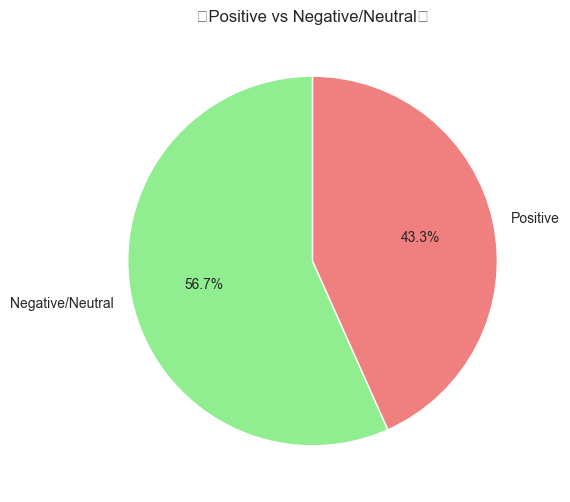

In [9]:
# Pie Chart
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral"])
plt.title("（Positive vs Negative/Neutral）")
plt.ylabel("")
plt.show()

/var/folders/d_/d4py_rj90y7_x0skvr3q26nw0000gn/T/ipykernel_24896/3959262341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette=["lightgreen", "lightcoral"])


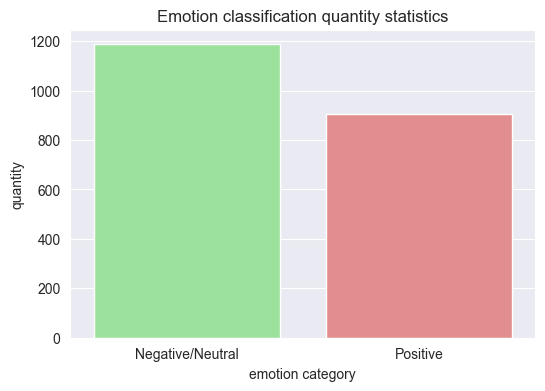

In [10]:
# Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment_label', palette=["lightgreen", "lightcoral"])
plt.title("Emotion classification quantity statistics")
plt.xlabel("emotion category")
plt.ylabel("quantity")
plt.show()

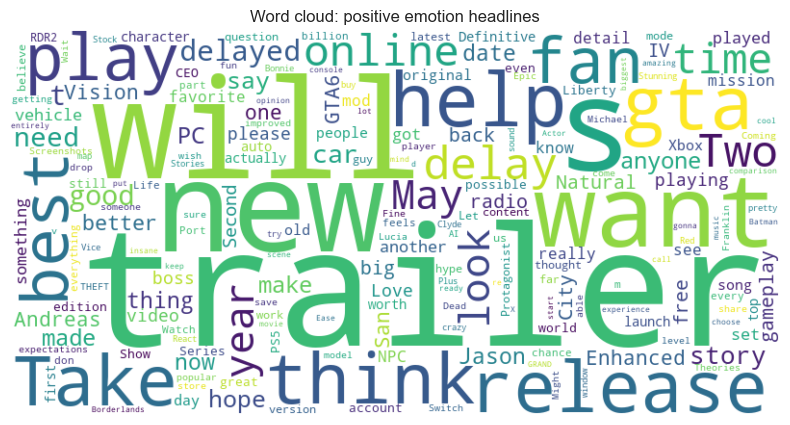

In [15]:
# Positive title word cloud
positive_titles = df[df['title_sentiment'] == 1]['title'].str.cat(sep=' ')
positive_titles = re.sub(r'\bGTA\b', '', positive_titles)
positive_titles = re.sub(r'\bAuto\b', '', positive_titles)
positive_titles = re.sub(r'\bTheft\b', '', positive_titles)
positive_titles = re.sub(r'\bgame\b', '', positive_titles)
positive_titles = re.sub(r'\bGame\b', '', positive_titles)
positive_titles = re.sub(r'\bGrand\b', '', positive_titles)
positive_titles = re.sub(r'\bVI\b', '', positive_titles)
positive_titles = re.sub(r'\bGames\b', '', positive_titles)
positive_titles = re.sub(r'\bRockstar\b', '', positive_titles)
positive_titles = re.sub(r'\bV\b', '', positive_titles)
positive_titles = re.sub(r'\bgames\b', '', positive_titles)
negative_titles = re.sub(r'\bgta\b', '', positive_titles)
negative_titles = re.sub(r'\bGta\b', '', positive_titles)
negative_titles = re.sub(r'\bGTA6\b', '', positive_titles)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(positive_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud: positive emotion headlines")
plt.show()

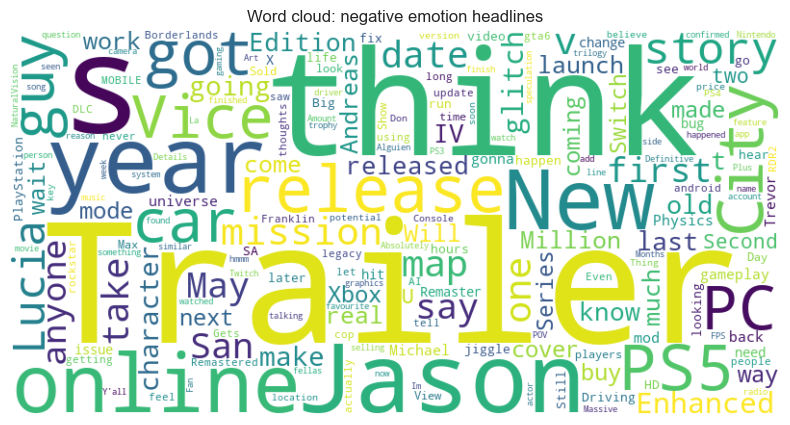

In [20]:
# Negative title word cloud
negative_titles = df[df['title_sentiment'] == 0]['title'].str.cat(sep=' ')
negative_titles = re.sub(r'\bGTA\b', '', negative_titles)
negative_titles = re.sub(r'\bAuto\b', '', negative_titles)
negative_titles = re.sub(r'\bTheft\b', '', negative_titles)
negative_titles = re.sub(r'\bgame\b', '', negative_titles)
negative_titles = re.sub(r'\bGame\b', '', negative_titles)
negative_titles = re.sub(r'\bGrand\b', '', negative_titles)
negative_titles = re.sub(r'\bVI\b', '', negative_titles)
negative_titles = re.sub(r'\bGames\b', '', negative_titles)
negative_titles = re.sub(r'\bRockstar\b', '', negative_titles)
negative_titles = re.sub(r'\bV\b', '', negative_titles)
negative_titles = re.sub(r'\bgames\b', '', negative_titles)
negative_titles = re.sub(r'\bgta\b', '', negative_titles)
negative_titles = re.sub(r'\bGta\b', '', negative_titles)
negative_titles = re.sub(r'\bGTA6\b', '', negative_titles)
negative_titles = re.sub(r'\bwill\b', '', negative_titles)
negative_titles = re.sub(r'\bGTA5\b', '', negative_titles)


wordcloud_neg = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(negative_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud: negative emotion headlines")
plt.show()

In [29]:
# Keyword high frequency statistics table
all_text = df['title'].str.cat(sep=' ')

# Remove specific words
words_to_remove = ['GTA', 'Auto', 'Theft', 'game', 'Rockstar', 'Grand', 'VI', 'Games', 'V', 'gta', 'you', ]
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'
all_text = re.sub(pattern, '', all_text)

words = re.findall(r'\b\w+\b', all_text.lower())



stopwords = set([
    'the', 'and', 'of', 'to', 'a', 'in', 'is', 'for', 'with', 'on',
    'at', 'this', 'that', 'we', 'be', 'an', 'as', 'are', 'do', 'it', 'was', 'by',
])

filtered_words = [w for w in words if w not in stopwords and len(w) > 2]

word_freq = Counter(filtered_words)

common_words = word_freq.most_common(20)

freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
display(freq_df)

,Word,Frequency
0,trailer,204
1,will,149
2,what,147
3,how,119
4,think,105
5,like,99
6,new,98
7,release,93
8,have,89
9,can,88


/var/folders/d_/d4py_rj90y7_x0skvr3q26nw0000gn/T/ipykernel_24896/2088446999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='Frequency', y='Word', palette='Blues_d')


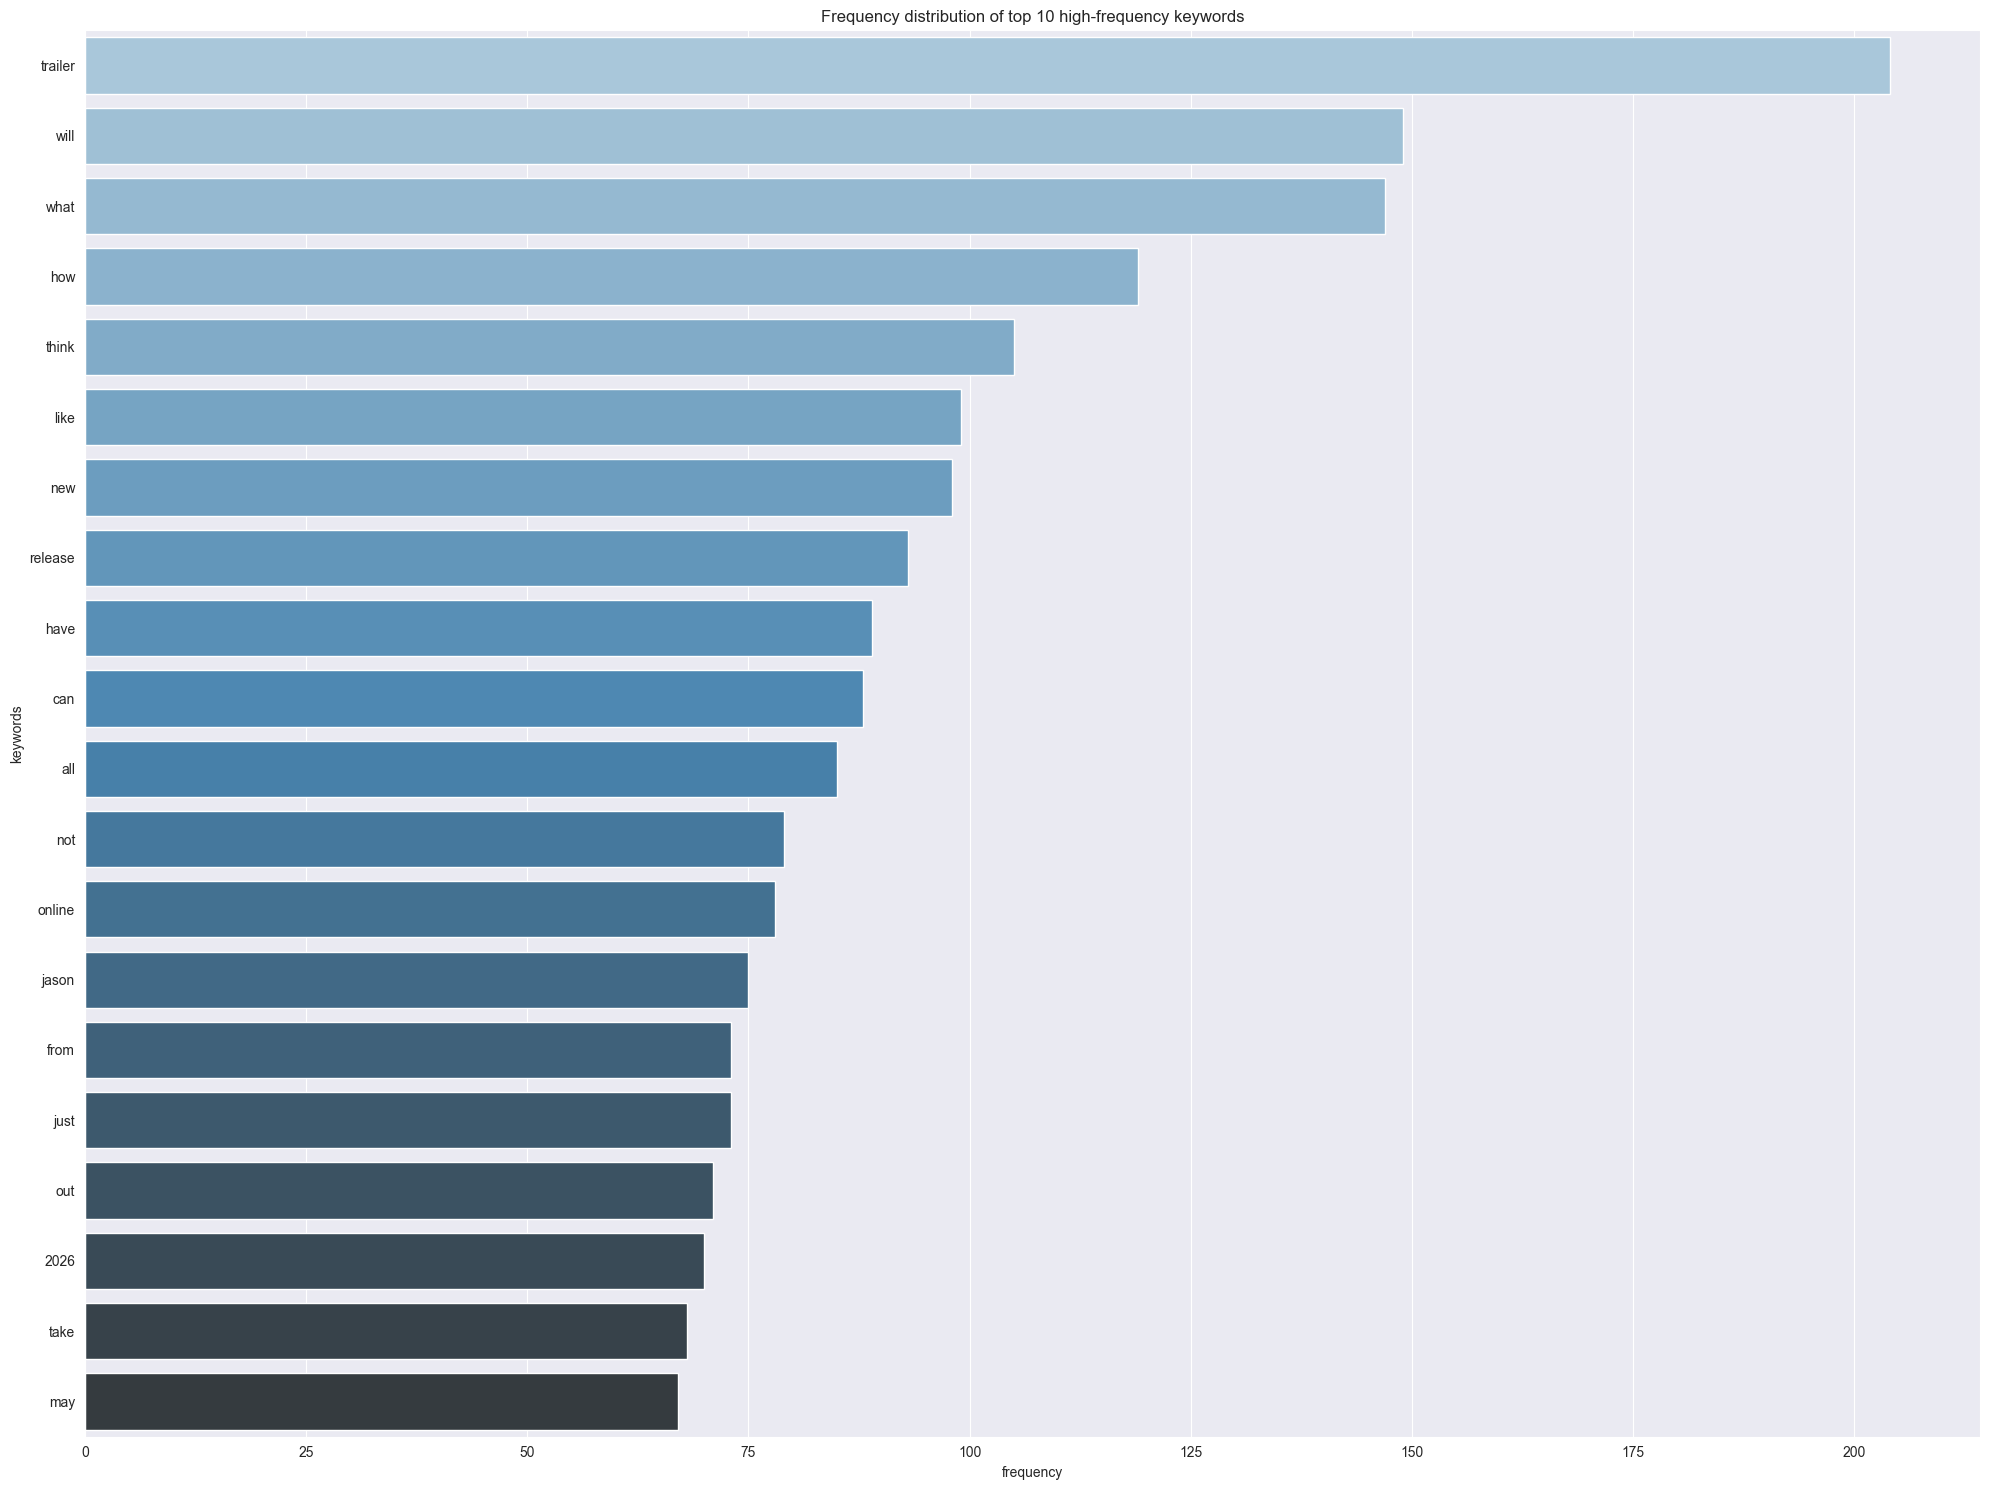

In [30]:
plt.figure(figsize=(20, 15))
sns.barplot(data=freq_df, x='Frequency', y='Word', palette='Blues_d')
plt.title("Frequency distribution of top 10 high-frequency keywords")
plt.xlabel("frequency")
plt.ylabel("keywords")
plt.tight_layout()
plt.show()

In [10]:
# Data table display
display(Markdown("Preview of original data (first 10 items)"))
display(df[['title', 'sentiment_label']].head(10))

Preview of original data (first 10 items)

,title,sentiment_label
0,GTA V is Twitch’s most watched game of 2024,Negative/Neutral
1,Second Grand Theft Auto 6 trailer arrives days...,Positive
2,"A New GTA VI Trailer Is Here, but We Still Don...",Negative/Neutral
3,Grand Theft Auto VI’s second trailer sets up i...,Positive
4,Epic’s Mega sale has big discounts on games li...,Positive
5,Will GTA 6 Be the First $100 Game? We Do the Math,Negative/Neutral
6,"Bad News, Gamers: GTA 6 Delayed to 2026",NaN
7,13 Details You Might Have Missed in GTA 6 Trai...,NaN
8,GTA Online update for the week of April 24,Negative/Neutral
9,GTA V and VTubers top Twitch’s list of 2024 st...,Positive
